# Проект спринта 3 "Статистический анализ данных"
# "Определение перспективного тарифа для телеком компании"

Проектная работа посвящена исследованию тарифных планов федеральной компании-оператора сотовой связи c целью определения 
приоритетного направления распределения маркетингового бджета по показателю полученной выручки,
а именно, какой из тарифов приносит больше выручки

цель проекта - провести предварительный анализ тарифов «Смарт» и «Ультра» на небольшой выборке клиентов и сделать вывод  
какой из тарифов лучше по показателю получаемой выручки

задачи по проекту:
1.исследовать данные по трем основным параметрам: продолжительность разговоров, количество смс и объем использованного трафика
2.сравнить относительные показатели по тарифам
3.сравнить абсолютные показатели выручки по тарифам - сделать выводы и рекомендации
#ожидаемый результат проекта - вывод с пояснениями, какой из тарифов формирует больше выручки. Если это возможно, рекомендации


### краткий план реализации проекта
### провести первичную загрузку и оценку данных
### выполнить предобработку
### сгруппировать необходимые выборки данных - сгруппировать частные таблицы и общую - как свод всех исходных данных
### получить и проанализировать основные статистические параметры полученных выборок, описать их
### сравнить целевые данные (а именно, данные по каждоу из тарифов)
### сделать выводы и рекомендации


шаг 1 предобработка данных - импортируем и изучаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')



талица 1

In [2]:
calls_data.info()
calls_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


пример описания данных:
calls_data - дата фрейм (таблица) с данными по продолжительности звонков по идентификационному коду абонента с детализацией до даты звонка, с его продолжительность.
4 колонки (id звонка (id абонента + индекс строки), дата звонка в формате год-месяц-порядковый номер дня месяца, id абонента)
типы данных:
id объект-строковый тип данных
call_date-строковый тип данных
duration-вещественный тип числовых данных (дробь)
user_id-целочисленное значение

202607 строк
пропущенные значение отсуствуют


Действия, необходимые для предобработки данных:
колонка call_date  заменим тип данных object к формату даты 
колонка duration - окргулим значения вверх и изменим тип на int (т.к. по условию задания, звонки округляются до минут)
округляем сразу, до промежуточных расчетов, сделав допущение, что округление производится по каждой транзакции

In [3]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%dT%H:%M:%S')
calls_data['year'] = pd.DatetimeIndex(calls_data['call_date']).year
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month


добавим период в таблицу calls_data, исходя из текста задания к проекту, он нам понадобится

проверим успешность замены

In [4]:
calls_data.info()

calls_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
year         202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.3+ MB


,id,call_date,duration,user_id,year,month
0,1000_0,2018-07-25,0.00,1000,2018,7
1,1000_1,2018-08-17,0.00,1000,2018,8
2,1000_2,2018-06-11,2.85,1000,2018,6
3,1000_3,2018-09-21,13.80,1000,2018,9
4,1000_4,2018-12-15,5.18,1000,2018,12
5,1000_5,2018-11-02,0.00,1000,2018,11
6,1000_6,2018-10-18,0.00,1000,2018,10
7,1000_7,2018-08-22,18.31,1000,2018,8
8,1000_8,2018-09-15,18.44,1000,2018,9
9,1000_9,2018-08-15,0.00,1000,2018,8


посчитаем количество строк, в которых продолжительность звонков равна 0 (порядка 20% от всего количества строк - откинуть их нельзя)

In [5]:
calls_data[calls_data['duration']==0].count()

id           39613
call_date    39613
duration     39613
user_id      39613
year         39613
month        39613
dtype: int64

звонки, продолжительностью 0 = звонкам продолжительностью 0 минут 0 десятых минут. 
0,1 минуты = 6 секундам, таким образом, если пользователь говорил менее 6 секунд, продолжительность звонка округляется до 0.
заменим 0 на 1, сделав допущение, что, исходя из комментария выше,
предполагается, что в реальности это звонки длительностью 1 минута (с точки зрения тарификации).
звонки продолжительностью 0 минут заменим на 1.


In [6]:

calls_data.loc[calls_data['duration'] ==0, 'duration']=1

---
## Комментарий от наставника

Согласно описанной выше гипотезы нулевые значения в длительности звонков обработаны верно. 

---

#проверим успешность замены

In [7]:
calls_data[calls_data['duration']==0].count()



id           0
call_date    0
duration     0
user_id      0
year         0
month        0
dtype: int64

---
## Комментарий от наставника

Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку.

---

округлим вверх до минут

In [8]:

import math
calls_data['duration'] = calls_data['duration'].apply(math.ceil).astype('int')


In [9]:
calls_data.info()
calls_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
year         202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.3+ MB


,id,call_date,duration,user_id,year,month
0,1000_0,2018-07-25,1,1000,2018,7
1,1000_1,2018-08-17,1,1000,2018,8
2,1000_2,2018-06-11,3,1000,2018,6
3,1000_3,2018-09-21,14,1000,2018,9
4,1000_4,2018-12-15,6,1000,2018,12
5,1000_5,2018-11-02,1,1000,2018,11
6,1000_6,2018-10-18,1,1000,2018,10
7,1000_7,2018-08-22,19,1000,2018,8
8,1000_8,2018-09-15,19,1000,2018,9
9,1000_9,2018-08-15,1,1000,2018,8


таблица 2

In [10]:

internet_data.info()
internet_data.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


колонка session_date  заменим тип данных object к формату даты 
округление до гигабайт будет выполнено при промежуточных вычислениях (т.к. по условимя в пакет входит объем интернет-трафика в Гигабайтах)
следовательно при превышении этого порога - докупается доп. пакет, при недостижении остаток сгорает

In [11]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%dT%H:%M:%S')
internet_data['year'] = pd.DatetimeIndex(internet_data['session_date']).year
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month



#добавим период в таблицу internet_data, исходя из текста задания к проекту, он нам понадобится

In [12]:
import math
internet_data['mb_used'] = internet_data['mb_used'].apply(math.ceil).astype('int')

проверим успешность замены

In [13]:
internet_data.info()
internet_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 7 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
year            149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.0+ MB


,Unnamed: 0,id,mb_used,session_date,user_id,year,month
0,0,1000_0,113,2018-11-25,1000,2018,11
1,1,1000_1,1053,2018-09-07,1000,2018,9
2,2,1000_2,1198,2018-06-25,1000,2018,6
3,3,1000_3,551,2018-08-22,1000,2018,8
4,4,1000_4,303,2018-09-24,1000,2018,9
5,5,1000_5,400,2018-10-02,1000,2018,10
6,6,1000_6,541,2018-09-07,1000,2018,9
7,7,1000_7,416,2018-07-11,1000,2018,7
8,8,1000_8,506,2018-10-08,1000,2018,10
9,9,1000_9,346,2018-09-03,1000,2018,9


талица 3

In [14]:
messages_data.info()

messages_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


колонка message_date - заменим тип данных object к формату даты 

In [15]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%dT%H:%M:%S')
messages_data['year'] = pd.DatetimeIndex(messages_data['message_date']).year
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month




в таблицу messages_data добавим период, исходя из текста задания к проекту, он нам понадобится

проверим успешность замены

In [16]:
messages_data.info()

messages_data.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 5 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
year            123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB


,id,message_date,user_id,year,month
0,1000_0,2018-06-27,1000,2018,6
1,1000_1,2018-10-08,1000,2018,10
2,1000_2,2018-08-04,1000,2018,8
3,1000_3,2018-06-16,1000,2018,6
4,1000_4,2018-12-05,1000,2018,12
5,1000_5,2018-06-20,1000,2018,6
6,1000_6,2018-11-19,1000,2018,11
7,1000_7,2018-10-29,1000,2018,10
8,1000_8,2018-06-25,1000,2018,6
9,1000_9,2018-12-18,1000,2018,12


Таблица 4

In [17]:

tariffs_data.info()
tariffs_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


предобработка в таблице tariffs_data не нужна

таблица 5

In [18]:

users_data.info()
users_data.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


колонка reg_date  заменим тип данных object к формату даты 

In [19]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users_data['year'] = pd.DatetimeIndex(users_data['reg_date']).year
users_data['month'] = pd.DatetimeIndex(users_data['reg_date']).month

In [20]:
users_data.info()
users_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
year          500 non-null int64
month         500 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 39.2+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,year,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018,5
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018,1
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018,2
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,2018,4
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,2018,12
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,2018,3


#проверим успешность замены
#пропущенных значений нет - т.к. пропуск означает, что контракт еще действовал

алгоритм предобработки данных - визуальная оценка информации, послее ее вывода методом info
такая оценка показывает, что необходимо сделать два типа исправлений - убрать нулевые значения и исправить типы данных
найденные ошибки отсуствуют
замена типов данных произведена


# Блок 2 анализ данных - расчеты, визуализации.

Посчитайте для каждого пользователя:
количество сделанных звонков 
и израсходованных минут разговора по месяцам;
примечание по сводной таблице когда требуется вычислить обобщенные значения по каждой группе,
это можно сделать с помощью параметра margins
в тексте задачи не указано, делать группировку по месяцам, независимо от года или нет.
предположительно, речь идет о периоде - месяц+год (далее анализ данных строится по этому принципу)




In [21]:
calls_data['count_calls'] = len(calls_data['user_id'])

calls_pivot = calls_data.pivot_table(index =['user_id', 'year', 'month']
                                       ,values = ['duration', 'count_calls'], 
                                     aggfunc ='sum', margins = True)


In [22]:
calls_pivot.head(10)

count_calls  duration
user_id year month                       
1000    2018 5          4457354       164
             6          8712101       187
             7          9522529       346
             8         10535564       418
             9         11751206       478
             10        11548599       363
             11         8712101       344
             12         9319922       341
1001    2018 11        11953813       444
             12        12764241       430

#Посчитайте для каждого пользователя:
#количество отправленных сообщений по месяцам;
#переведем значения столбца с количеством сообщений к типу int (количество отправленных сообщений может быть только целым)


In [23]:
messages_pivot = messages_data.pivot_table(index =['user_id', 'year', 'month'],values = 'id', aggfunc ='count')

messages_pivot.columns = ['count_of_messages']

messages_pivot['count_of_messages'] = messages_pivot['count_of_messages'].astype('int')

In [24]:
messages_pivot.head(10)

count_of_messages
user_id year month                   
1000    2018 5                     22
             6                     60
             7                     75
             8                     81
             9                     57
             10                    73
             11                    58
             12                    70
1002    2018 6                      4
             7                     11

Посчитайте для каждого пользователя:
объем израсходованного интернет-трафика по месяцам;
так как тарификация рассчитывается в гигабайт, переведем мегабайты в гигабайты 
посчитаем расход по соотношению признаков месяц-пользователь и округлим до целого




In [25]:

internet_data['gb_used'] = (internet_data['mb_used'] / 1024)

internet_pivot = internet_data.pivot_table(index =['user_id', 'year', 'month'],values = 'gb_used', aggfunc ='sum')
internet_pivot['gb_used'] = internet_pivot['gb_used'].apply(math.ceil).astype('int')

In [26]:
internet_pivot.head(10)

gb_used
user_id year month         
1000    2018 5            3
             6           23
             7           14
             8           14
             9           15
             10          15
             11          15
             12          10
1001    2018 11          19
             12          14

Посчитайте для каждого пользователя:
помесячную выручку с каждого пользователя 
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
остаток умножьте на значение из тарифного плана; 
прибавьте абонентскую плату, соответствующую тарифному плану).

для расчета объединим таблицы по звонкам,сообщениям и трафику (1) методом join по логической связке = пользователь (ID), 
период (год+месяц)
добавим город и тип тарифа аналогичным методом (2)
введем пользовательскую фугкцию для расчета помесячной выручки (3)

In [27]:
calls_messages_traf = (
                        calls_pivot.merge(messages_pivot,on=['user_id','year','month'])
                        .merge(internet_pivot, on=['user_id','year','month'])
                       )

In [28]:
calls_messages_traf.head(20)

count_calls  duration  count_of_messages  gb_used
user_id year month                                                   
1000    2018 5          4457354       164                 22        3
             6          8712101       187                 60       23
             7          9522529       346                 75       14
             8         10535564       418                 81       14
             9         11751206       478                 57       15
             10        11548599       363                 73       15
             11         8712101       344                 58       15
             12         9319922       341                 70       10
1002    2018 6          3039105       118                  4       11
             7          5267782       219                 11       18
             8          8509494       294                 13       20
             9          7293852       217                  4       17
             10         6686031       221                 10       14
             11         6483424       250                 16       19
             12         6686031       242                 12       18
1003    2018 8         11143385       392                 37        9
             9         27149338       990                 91       13
             10        21881556       866                 83       15
             11        23299805       844                 94       12
             12        21881556       822                 75       10

In [29]:
summary_data = calls_messages_traf.join(users_data[['user_id','city','tariff']].set_index(['user_id']), on = 'user_id') \
.reset_index()


In [30]:
summary_data

,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff
0,1000,2018,5,4457354,164,22,3,Краснодар,ultra
1,1000,2018,6,8712101,187,60,23,Краснодар,ultra
2,1000,2018,7,9522529,346,75,14,Краснодар,ultra
3,1000,2018,8,10535564,418,81,14,Краснодар,ultra
4,1000,2018,9,11751206,478,57,15,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
2662,1498,2018,10,8306887,258,42,21,Владикавказ,smart
2663,1499,2018,9,1823463,71,11,2,Пермь,smart
2664,1499,2018,10,13777276,473,48,18,Пермь,smart
2665,1499,2018,11,14992918,624,59,18,Пермь,smart


In [31]:
def user_profit(row):
    if row['tariff']  == 'ultra':
        if row['duration'] > tariffs_data.loc[1,'minutes_included']: 
#пример того, как можно писать код в реальной жизни, когда параметры тарифов могут (и скорее всего) будут менятся
# то есть, обращаемся к внешней таблице-справочнику с условиями тарифа (по идее, такая реализация кода д.б. прописана для всех строк)
            cost_duration = (row['duration'] - 3000) * 1
        else:    
            cost_duration = 0
        if row['count_of_messages'] > 1000:
            cost_messages = (row['count_of_messages'] - 1000) * 1
        else:
            cost_messages = 0
        if row['gb_used'] > 30:
            cost_traf = (row['gb_used'] - 30) * 150
        else:
            cost_traf = 0
        total_profit = cost_duration + cost_messages + cost_traf + 1950
    else:
        if row['duration'] > 500:
            cost_duration = (row['duration'] - 500) * 3
        else:    
            cost_duration = 0
        if row['count_of_messages'] > 50:
            cost_messages = (row['count_of_messages'] - 50) * 3
        else:
            cost_messages = 0
        if row['gb_used'] > 15:
            cost_traf = (row['gb_used'] - 15) * 200
        else:
            cost_traf = 0
        total_profit = cost_duration + cost_messages + cost_traf + 550
    return total_profit

в объединенной таблице создадим столбец для расчета выручки и применим созданную пользовательскую функцию

In [32]:
summary_data['total_profit'] = summary_data.apply(user_profit, axis=1)

summary_data.head(30)

,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
0,1000,2018,5,4457354,164,22,3,Краснодар,ultra,1950
1,1000,2018,6,8712101,187,60,23,Краснодар,ultra,1950
2,1000,2018,7,9522529,346,75,14,Краснодар,ultra,1950
3,1000,2018,8,10535564,418,81,14,Краснодар,ultra,1950
4,1000,2018,9,11751206,478,57,15,Краснодар,ultra,1950
5,1000,2018,10,11548599,363,73,15,Краснодар,ultra,1950
6,1000,2018,11,8712101,344,58,15,Краснодар,ultra,1950
7,1000,2018,12,9319922,341,70,10,Краснодар,ultra,1950
8,1002,2018,6,3039105,118,4,11,Стерлитамак,smart,550
9,1002,2018,7,5267782,219,11,18,Стерлитамак,smart,1150


In [33]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 10 columns):
user_id              2667 non-null int64
year                 2667 non-null int64
month                2667 non-null int64
count_calls          2667 non-null int64
duration             2667 non-null int64
count_of_messages    2667 non-null int64
gb_used              2667 non-null int64
city                 2667 non-null object
tariff               2667 non-null object
total_profit         2667 non-null int64
dtypes: int64(8), object(2)
memory usage: 208.5+ KB


---
## Комментарий от наставника

Финальная таблица получена верным образом. Здорово, что она не содержит излишней информации в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит.

---

# Блок 3 изучаем и описываем данные

Опишите поведение клиентов оператора, исходя из выборки. (1)
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? (2)
Посчитайте среднее количество, дисперсию и стандартное отклонение. (3)
Постройте гистограммы. (4)
Опишите распределения.(5)

Опишите поведение клиентов оператора, исходя из выборки. (1)

In [34]:
summary_data_pivot = summary_data.pivot_table(index ='tariff' ,values = 'user_id', aggfunc ='count')

summary_data_pivot_1 = summary_data.pivot_table(index ='tariff' ,values = 'total_profit', aggfunc ='sum')

summary_data_pivot_2 = summary_data.pivot_table(index =['city','tariff'] ,values = 'user_id', aggfunc ='count').sort_values(by='user_id',ascending=False).head(10)



print(summary_data_pivot)
print(summary_data_pivot_1)
print(summary_data_pivot_2)


        user_id
tariff         
smart      1915
ultra       752
        total_profit
tariff              
smart        2513738
ultra        1541400
                         user_id
city             tariff         
Москва           smart       293
                 ultra       198
Санкт-Петербург  smart       182
Ульяновск        smart        67
Уфа              smart        65
Казань           smart        56
Набережные Челны smart        49
Улан-Удэ         smart        47
Омск             smart        47
Самара           smart        46


по результатам анализа данных видим, что основная масса пользователей (72%) предпочитает тариф smart тарифу ultra
то есть, как минимум два человека из трех выюират тариф smart
вместе с тем, 72% пользователей, предпочитащих тариф smart приносят 61% выручки (2.5 млн. руб.)
что говорит о менее эффективном с точки зрения формирования выручки тарифе 1% пользователей приносит 0.9% выручки. 
зато эта группа формирует "объем". 
в крупнейших городах-Москве и Санкт-Петербурге аоненты склонны отдавать предпочтения в большей степни или полностью, тарифу smart


сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? (2)
из сводного датафрема получим для каждого тарифа свой срез данных, воспользовавшийсь методом query 
сформируем сводную таблицу, чтобы получить общую сумму минут разговора, сообщений и объём интернет-трафика  

In [35]:
ultra_data = summary_data.query('tariff == "ultra"')

ultra_data.head(10)


,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
0,1000,2018,5,4457354,164,22,3,Краснодар,ultra,1950
1,1000,2018,6,8712101,187,60,23,Краснодар,ultra,1950
2,1000,2018,7,9522529,346,75,14,Краснодар,ultra,1950
3,1000,2018,8,10535564,418,81,14,Краснодар,ultra,1950
4,1000,2018,9,11751206,478,57,15,Краснодар,ultra,1950
5,1000,2018,10,11548599,363,73,15,Краснодар,ultra,1950
6,1000,2018,11,8712101,344,58,15,Краснодар,ultra,1950
7,1000,2018,12,9319922,341,70,10,Краснодар,ultra,1950
15,1003,2018,8,11143385,392,37,9,Москва,ultra,1950
16,1003,2018,9,27149338,990,91,13,Москва,ultra,1950


In [36]:
ultra_data.pivot_table(index =['tariff'],values = ['duration','count_of_messages','gb_used'], aggfunc ='mean').apply(math.ceil)

count_of_messages     62
duration             572
gb_used               20
dtype: int64

In [37]:
smart_data = summary_data.query('tariff == "smart"')

smart_data.head(10)


,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
8,1002,2018,6,3039105,118,4,11,Стерлитамак,smart,550
9,1002,2018,7,5267782,219,11,18,Стерлитамак,smart,1150
10,1002,2018,8,8509494,294,13,20,Стерлитамак,smart,1550
11,1002,2018,9,7293852,217,4,17,Стерлитамак,smart,950
12,1002,2018,10,6686031,221,10,14,Стерлитамак,smart,550
13,1002,2018,11,6483424,250,16,19,Стерлитамак,smart,1350
14,1002,2018,12,6686031,242,12,18,Стерлитамак,smart,1150
28,1005,2018,1,3039105,99,7,3,Набережные Челны,smart,550
29,1005,2018,2,13979883,470,38,8,Набережные Челны,smart,550
30,1005,2018,3,15600739,620,56,11,Набережные Челны,smart,928


In [38]:
smart_data.pivot_table(index ='tariff',values = ['duration','count_of_messages','gb_used'], aggfunc ='mean').apply(math.ceil)

count_of_messages     39
duration             433
gb_used               17
dtype: int64

тариф ультра
средние показатели
минут разговора 433
сообщений 39
объём интернет трафика 17

тариф смарт
средние показатели
минут разговора 572
сообщений 62
объём интернет трафика 20

In [39]:
print(smart_data['duration'].describe())

import numpy as np
print(np.var(smart_data['duration'], ddof=1))


print(np.std(smart_data['duration']))



count    1915.000000
mean      432.637598
std       192.218259
min         1.000000
25%       295.000000
50%       440.000000
75%       561.500000
max      1471.000000
Name: duration, dtype: float64
36947.85919171912
192.16806516814955


Комментарии по механике и логике расчетов:
можно стнад. отклонение брать и их данных метода describe
посчитайте среднее количество, дисперсию и стандартное отклонение.(3)
минуты разговора
тариф smart
среднее - 433
дисперсия - 36948
стандартное отклонение 192



что видим в данных медиана равна 440, среднее 433.
медиана больше среднего
помня о том, что медиана в отличие от среднего устойчива к выбросам,
можно сделать вывод,что ряд данных скошен влево (в сторону нулевых, меньших значений) 
о чем и свидетельсвует наличие большого колчисетва данных с локацией распределения возле 0
в блоке по предобработке мы производили такую замену
отклонение составляет 192 минуты в месяц, что немало. 
Однако, в среднем, это около 7 минут в день, что в целом, выглядит реалистичным

In [40]:
print(smart_data['count_of_messages'].describe())

import numpy as np
print(np.var(smart_data['count_of_messages'], ddof=1))

print(np.std(smart_data['count_of_messages']))


count    1915.000000
mean       38.767102
std        26.810513
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: count_of_messages, dtype: float64
718.8036193391555
26.803512175995582


количество сообщений
тариф smart
среднее - 39
дисперсия - 719
стандартное отклонение 26

что видим в данных медиана равна 34, среднее 39.
медиана меньше среднего
помня о том, что медиана в отличие от среднего устойчива к выбросам,
можно сделать вывод,что ряд данных скошен вправо (в сторону максимальных, бОльших значений) 
разница между медианой и средним составляет всего 5 сообщений в месяц, что говорит об относительно сбалансированном распределении значений данных
отклонение составляет 26 сообщений в месяц. 
в среднем, это около 1 сообщения в день (или чуть меньше), что в целом, выглядит реалистичным

In [41]:
print(smart_data['gb_used'].describe())

import numpy as np
print(np.var(smart_data['gb_used'], ddof=1))

print(np.std(smart_data['gb_used']))


count    1915.000000
mean       16.393734
std         5.683351
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64
32.30048317877615
5.6818673062411795


объем трафика
тариф smart
среднее - 16.39
дисперсия - 32
стандартное отклонение 5.68
что видим в данных медиана равна 17, среднее 16.39.
медиана меньше среднего
помня о том, что медиана в отличие от среднего устойчива к выбросам,
можно сделать вывод,что ряд данных скошен вправо (в сторону максимальных, бОльших значений) 
разница между медианой и средни составляет менее 1 Гб в месяц

In [42]:
print(ultra_data['duration'].describe())

import numpy as np
print(np.var(ultra_data['duration'], ddof=1))

print(np.std(ultra_data['duration']))


count     752.000000
mean      571.845745
std       319.835552
min         1.000000
25%       341.000000
50%       551.500000
75%       779.000000
max      1727.000000
Name: duration, dtype: float64
102294.78043459782
319.62282481303913


минуты разговора тариф ultra
среднее - 572 дисперсия - 102295 стандартное отклонение 320

что видим в данных медиана равна 552, среднее 572. 
медиана меньше среднего помня о том, что медиана в отличие от среднего устойчива к выбросам, 
можно сделать вывод,что ряд данных скошен вправл (в сторону больших значений)
отклонение составляет 320 минуты в месяц, что с первого взгляда кажется существенным. 
Однако, в среднем, это около 10 минут в день, что в целом, выглядит реалистичным

In [43]:
print(ultra_data['count_of_messages'].describe())

import numpy as np
print(np.var(ultra_data['count_of_messages'], ddof=1))

print(np.std(ultra_data['count_of_messages']))

count    752.000000
mean      61.640957
std       44.816850
min        1.000000
25%       25.000000
50%       53.000000
75%       89.000000
max      224.000000
Name: count_of_messages, dtype: float64
2008.5500113324078
44.78704128616225


In [44]:
print(ultra_data['gb_used'].describe())

import numpy as np
print(np.var(ultra_data['gb_used'], ddof=1))

print(np.std(ultra_data['gb_used']))

count    752.000000
mean      19.652926
std        9.399579
min        0.000000
25%       12.000000
50%       20.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64
88.3520819758053
9.393327020022927


объем трафика
тариф ultra
среднее - 19.65
дисперсия - 88.35
стандартное отклонение 9.4
что видим в данных медиана равна 20, среднее 19.65.
медиана больше среднего
помня о том, что медиана в отличие от среднего устойчива к выбросам,
можно сделать вывод,что ряд данных скошен влево (в сторону меньших значений) 
это первый показатель в котором медиана выше среднего. Соотвтсвенно, либо выбросов слишклм много, либо пользователи этого тарифа меньший акцент делают на исчерпание лимита по трафику.\

найдем iqr для тарифов по каждому из показателей
напомним,iqr = интерквартильный размах.Интервал значений признака, содержащий центральные 50% наблюдений выборки, т.е. интервал между 25-м и 75-м процентилями.
напишем универсальную формулу
находим квартили методом describe,
ограничения для чистки выбросов (по границам усов)
нижнее ограничение (по первому квартилю) используем только при его положительном занчении

In [45]:

   
def iqr_data (KPI):
    df = KPI.describe().T
    q1 = df['25%']
    q3 = df['75%']
    iqr = q3 - q1
    print(iqr) 
    restriction = q3+(1.5* iqr)
    print(restriction)
    restriction_1 = q1-(1.5*iqr)
    print(restriction_1)


In [46]:
iqr_data(smart_data['duration'])

266.5
961.25
-104.75


In [47]:
iqr_data(smart_data['count_of_messages'])

38.0
112.0
-40.0


In [48]:
iqr_data(smart_data['gb_used'])

7.0
30.5
2.5


In [49]:
iqr_data(ultra_data['duration'])

438.0
1436.0
-316.0


In [50]:
iqr_data(ultra_data['count_of_messages'])

64.0
185.0
-71.0


In [51]:
iqr_data(ultra_data['gb_used'])

15.0
49.5
-10.5


Постройте гистограммы. (4)
строим графики распределения:продолжительности разговоров,использования трафика и количества смс помесячно в обоих тарифах
для большей наглядности совместим два вида графиков


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

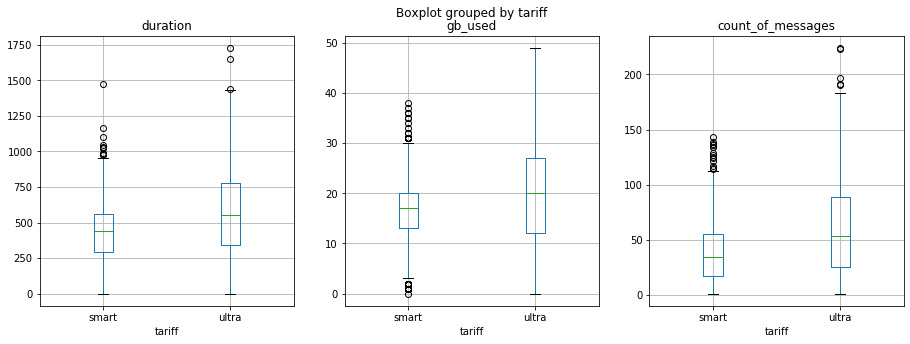

In [52]:
plt.subplots(figsize = (15,5)) #задаем таблицу для отрисовки графиков вместе
#(для этого вызываем метод subplots)
summary_data.boxplot('duration', by = 'tariff', ax = plt.subplot(1, 3, 1)) #первая ячейка
summary_data.boxplot('gb_used', by = 'tariff', ax = plt.subplot(1, 3, 2)) #вторая ячейка
summary_data.boxplot('count_of_messages', by = 'tariff', ax = plt.subplot(1, 3, 3)) #третья ячейка



Опишите распределения.(5)
Выведем результат метода describe(),определим iqr и границы, за которыми начинаются выбросы.

показатель "минуты разговора" (duration)
на графиках для обоих тарифов видим выбросы. Для тарифа smart их гораздо больше, чем для тарифа ultra.
основной диапазон их концентрации от 1000 до 10050 секунд. Для тарифа ultra они единичны.
границы выбросов:
1 и 3 квартили
smart
25%       295.000000
75%       561.500000
iqr = q3 - q1 = 266.5
ultra
25%       341.000000
75%       779.000000
iqr = 438
продолжительность звонков в тарифе ultra больше, чем в smart - что ожидаемо



показатель "количество смс" (count_of_messages)
на графиках для обоих тарифов видим выбросы. Для тарифа smart их гораздо больше, чем для тарифа ultra.
основной диапазон их концентрации от 100 до 150 сообщений. Для тарифа ultra они единичны.
границы выбросов:
1 и 3 квартили
smart
25%        17.000000
75%        55.000000
iqr  = 38
ultra
25%       25.000000
75%       89.00000
iqr = 64
количество смс в тарифе ultra больше, чем в smart - что ожидаемо

показатель "объем трафика" (gb_used)
на графиках для обоих тарифов видим выбросы. Для тарифа smart их гораздо больше, чем для тарифа ultra.
основной диапазон их концентрации от 30 до 40 Гб, и от 0 до 4. Для тарифа ultra они единичны.
границы выбросов:
1 и 3 квартили
smart
25% 13.000000
75% 20.000000
iqr  = 7
ultra
25%       12.000000
75%       27.000000
iqr = 15
объем израсходованного трафика в ultra больше, чем в smart - что ожидаемо

общие выводы на основании данных, которые пока не прошли очистку от выборосов.
по использовани тариф smart менее сбалансированный, чем ultra - в нем больше выбросов.
по всем средневзвешенным показателям использование тарифа ultra превосходит smart, что логично (и исходит из самих условий тарифа)

очистим данные от выбросов 
в качестве границ используем квартили и усы (в зависисмости от наличия выросов на графиках)
smart
'duration' = 961.25
'gb_used' = 30.5 (нижняя граница 2.5)
'count_of_messages' = 112

в данном случае автоматизация расчета не целезообразна, т.к. сложная и по факту в дальнейшем не пригодится
хотя, возможна примерно так прописать в формуле получение квартиелей методом desribe (по трем показателям)
в переменные передать расчет нижних и верхних квартилей
задать в формуле срез через query формирование среза данных с фильтрацие по границам черех обращение к внешней переменной 
(для нижних границ также задать условие их положительности)

In [53]:
smart_data_clean = summary_data.query( 'duration <= 962\
                                  and count_of_messages <= 112 \
                                  and gb_used >= 2.5\
                                  and gb_used <= 30.5'\
                                  )
                                 
smart_data_clean 


,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
0,1000,2018,5,4457354,164,22,3,Краснодар,ultra,1950
1,1000,2018,6,8712101,187,60,23,Краснодар,ultra,1950
2,1000,2018,7,9522529,346,75,14,Краснодар,ultra,1950
3,1000,2018,8,10535564,418,81,14,Краснодар,ultra,1950
4,1000,2018,9,11751206,478,57,15,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
2661,1498,2018,9,11953813,477,44,22,Владикавказ,smart,1950
2662,1498,2018,10,8306887,258,42,21,Владикавказ,smart,1750
2664,1499,2018,10,13777276,473,48,18,Пермь,smart,1150
2665,1499,2018,11,14992918,624,59,18,Пермь,smart,1549


очистим данные от выбросов 
в качестве границ используем квартили и усы (в зависисмости от наличия выросов на графиках)

ultra
'duration' = 1436.0
'gb_used' = 49.5 
'count_of_messages' = 185.0


In [54]:
ultra_data_clean = summary_data.query( 'duration <= 1436.0\
                                  and count_of_messages <= 185.0\
                                  and gb_used <= 49.5'\
                                  )
                                 
ultra_data_clean  

,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
0,1000,2018,5,4457354,164,22,3,Краснодар,ultra,1950
1,1000,2018,6,8712101,187,60,23,Краснодар,ultra,1950
2,1000,2018,7,9522529,346,75,14,Краснодар,ultra,1950
3,1000,2018,8,10535564,418,81,14,Краснодар,ultra,1950
4,1000,2018,9,11751206,478,57,15,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
2662,1498,2018,10,8306887,258,42,21,Владикавказ,smart,1750
2663,1499,2018,9,1823463,71,11,2,Пермь,smart,550
2664,1499,2018,10,13777276,473,48,18,Пермь,smart,1150
2665,1499,2018,11,14992918,624,59,18,Пермь,smart,1549


# Блок 4. Проверка гипотез
смысловая концепция этого блока - сравнение тарифов по показателям прибыли

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
приступим к проверке статистической гипотезы.
сформулируем гипотезы
начнём с формулировки нулевой гипотезы H₀,исходя из правила,H₀ всегда формулируется так, чтобы использовать знак равенства
в нашем случае нулевая гипотеза может быть сформулирована так "средняя выручка пользователей тарифов «Ультра» и «Смарт» равны"
альтернативная гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны"
проверим это
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var) .

In [55]:
from scipy import stats as st
import numpy as np

alpha = .05 

hypothesis_1 = st.ttest_ind(ultra_data_clean['total_profit'], smart_data_clean['total_profit'])
print('p-значение:', hypothesis_1.pvalue)

if (hypothesis_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    


p-значение: 9.75118932130498e-06
Отвергаем нулевую гипотезу


в ходе проверки гипотезы было получено равенсто вида pvalue < alpha
это значит, что если бы средние показатели выручки в группах были действительно равны, то мы бы заметили неравенство между средними в наших выборках. 
поэтому, если pvalue < alpha, то нужно говорить, что H0 отвергается, средние не равны

комментарии 
alpha - критический уровень статистической значимости.
если p-value окажется меньше его - 0 гтпотезу отвергаем

посмотрим гистограммы для проверки 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


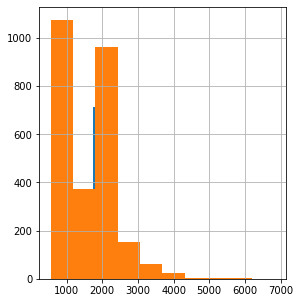

In [56]:

plt.subplots(figsize=(15,5))
smart_data_clean['total_profit'].hist(ax = plt.subplot(1,3,1)) 
ultra_data_clean['total_profit'].hist(ax = plt.subplot(1,3,1))

Графики не совпадают, таким образом, можно сделать вывод о том, что проверка гипотезы произведена корректно 

Вывод, согласно невозможности отвергнуть нулевую гипотезу средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

Шаг 4. Проверьте гипотезы
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
приступим к проверке статистической гипотезы.
сформулируем гипотезы
начнём с формулировки нулевой гипотезы H₀,исходя из правила,H₀ всегда формулируется так, чтобы использовать знак равенства
в нашем случае нулевая гипотеза может быть сформулирована так средняя выручка пользователей из Москвы равна выручке пользователей из других регионов"
альтернативная гипотеза  они не равны
проверим это

таблица по Москве

In [57]:
Moscow_data = summary_data.query('city == "Москва"')

In [58]:
Moscow_data

,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
15,1003,2018,8,11143385,392,37,9,Москва,ultra,1950
16,1003,2018,9,27149338,990,91,13,Москва,ultra,1950
17,1003,2018,10,21881556,866,83,15,Москва,ultra,1950
18,1003,2018,11,23299805,844,94,12,Москва,ultra,1950
19,1003,2018,12,21881556,822,75,10,Москва,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
2616,1490,2018,8,9117315,351,50,17,Москва,smart,950
2617,1490,2018,9,8914708,335,48,15,Москва,smart,550
2618,1490,2018,10,8509494,320,45,21,Москва,smart,1750
2619,1490,2018,11,7699066,289,47,19,Москва,smart,1350


таблица по прочим регионам/городам

In [59]:

Other_data = summary_data.query('city != "Москва"')

In [60]:
Other_data

,user_id,year,month,count_calls,duration,count_of_messages,gb_used,city,tariff,total_profit
0,1000,2018,5,4457354,164,22,3,Краснодар,ultra,1950
1,1000,2018,6,8712101,187,60,23,Краснодар,ultra,1950
2,1000,2018,7,9522529,346,75,14,Краснодар,ultra,1950
3,1000,2018,8,10535564,418,81,14,Краснодар,ultra,1950
4,1000,2018,9,11751206,478,57,15,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
2662,1498,2018,10,8306887,258,42,21,Владикавказ,smart,1750
2663,1499,2018,9,1823463,71,11,2,Пермь,smart,550
2664,1499,2018,10,13777276,473,48,18,Пермь,smart,1150
2665,1499,2018,11,14992918,624,59,18,Пермь,smart,1549


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var) .

In [61]:
alpha = .05 


hypothesis_1 = st.ttest_ind(Moscow_data['total_profit'], Other_data['total_profit'])
print('p-значение:', hypothesis_1.pvalue)

if (hypothesis_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1517605791788797
Не получилось отвергнуть нулевую гипотезу


комментарии 
alpha - критический уровень статистической значимости.
если p-value окажется меньше его - 0 гтпотезу отвергаем

посмотрим гистограммы для проверки 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


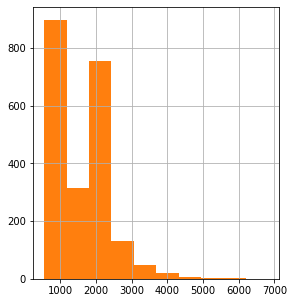

In [62]:
plt.subplots(figsize=(15,5))
Moscow_data['total_profit'].hist(ax = plt.subplot(1,3,1)) 
Other_data['total_profit'].hist(ax = plt.subplot(1,3,1))

нулевую гипотезу отвергунть не получилось. Вывод- средняя выручка пользователей Москвы и прочих регионов равна.

---
## Комментарий от наставника

Здесь все верно. 

---

общий вывод будем формулировать, исходя из цели проекта - требуется ответить на вопрос - по какому из тарифов выручка больше
найдем следующие показатели
суммарная выручка по каждому тарифу
доли пользователей по каждому тарифу
выручка на абонента по каждому тарифу уже получена

In [63]:
share_by_profit = summary_data[['tariff','total_profit']].groupby('tariff').sum()
share_by_profit['total'] = 2513738+1541400
share_by_profit['share'] = share_by_profit['total_profit'] / share_by_profit['total']
#4055138


In [64]:
len(smart_data['user_id'].unique())

301

0.71837709

In [65]:
len(ultra_data['user_id'].unique())

118

0.281622

# Общий вывод
тариф смарт с точки зрения формирования денежного оборота приоритетнее, интереснее, чем ультра.
несмотря на то, что использование минут звонков, смс и трафика в тарифе ультра выше, чем в тарифе смарт, смарт опережает тариф ультра из-за числа абонентов
так, 71.8% пользователей тарифа смарт формируют 61.9% выручки - тариф смарт приносит меньше выручки на 1% абонентов (0.86% выручки на 1% абонентов), чем тариф ультра, в котором 0.2816 процентов абонентов формируют 38% выручки (1.35% выручки на 1% абонентов).
исходя из поставленно преде исследованием задачей - определить наиболее приоритетный тариф - это смарт
рекомендации
в реальной жизни вряд ли правильно оценивать только показатель выручки - т.к. основной показатель бизнеса - маржа (прибыль)
скорее всего необходимо провести дополнительную оценку именно по этому показателю
а также емкость рынка, чтобы понять, возможно ли его расширение за счет только продвижения тарифа
оценить условия и поведение конкурентов
рекомендации, исходя из задачи проекта - оценить потвторно более обьемную выборку
добавить возраст абонента,пол и семейное положения для оценки гендерного и возрастного состава
это необходимо для формирования маркетингового кнцепта по продвижени (иными словами целевой аудитории)
дополнительно можно "поиграть" условиями тарифов, чтобы понять, каким образом можно переключить часть абонентов, кто выбирает лимиты в смарте на тариф ультра или смарт+ (придумать доп. условия тарифов)



<font color=blue> Вывод верный. В нем даны ответы на главные вопросы проекта. 
    
---